<a href="https://colab.research.google.com/github/jainavshah/DataSciencePortfolio/blob/main/Weather_and_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Weather and Energy
----------------------------------

*   obtain energy data and convert it on an hourly basis to draw insights for a week's worth of temperatures
*   download weather information for several air stations in Connecticut
1. prepare the weather data so that you may concentrate on just a few columns
2. eliminate the missing value
3. change to numerical columns
4. date-time indexed.
5. Resample data gathered at 5-minute intervals to 60-minute intervals.
6. compare the temperature trends across 2 or more stations to see if they are similar or different for the past week.

* Combine weather and energy data and use a scatter plot to examine their relationships.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download energy data 

* https://www.iso-ne.com/isoexpress/web/reports/load-and-demand
* downloded one week of data ( 0324 to 0331)

https://www.iso-ne.com/transform/csv/hourlysystemdemand?start=20200825&end=20200829

In [ ]:
# downloade data in drive and share Id
#https://drive.google.com/file/d/1SzzFjW-_gE9qT3Rtwv_H7JEGQh6kvBCv/view?usp=share_link
!gdown --id 1SzzFjW-_gE9qT3Rtwv_H7JEGQh6kvBCv

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SzzFjW-_gE9qT3Rtwv_H7JEGQh6kvBCv
To: /content/rt_hourlysysload_20230324_20230331.csv
100% 4.93k/4.93k [00:00<00:00, 8.60MB/s]


In [ ]:
# output data form download = rt_hourlysysload_20230324_20230331.csv
energy1=pd.read_csv('rt_hourlysysload_20230324_20230331.csv')
energy1

,C,Real-Time Hourly System Load Report,Unnamed: 2,Unnamed: 3
0,C,Filename: rt_hourlysysload_20230324_20230331.csv,NaN,NaN
1,C,Report for: 03/24/2023 - 03/31/2023,NaN,NaN
2,C,Report generated: 04/08/2023 17:12:26 EDT,NaN,NaN
3,H,Date,Hour Ending,Total Load
4,H,Date,HE,MWh
...,...,...,...,...
193,D,3/31/2023,21,13625.93
194,D,3/31/2023,22,12959.29
195,D,3/31/2023,23,12132.21
196,D,3/31/2023,24,11296.82


## Data cleaning
*   Remove unnecessary rows 




In [ ]:
# (top 5 rows-skiprows and last 1 row-skipfotter)
energy = pd.read_csv('rt_hourlysysload_20230324_20230331.csv', 
                     skiprows=5, 
                     skipfooter=1)
energy

<ipython-input-17-2aa1ca20a3de>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  energy = pd.read_csv('rt_hourlysysload_20230324_20230331.csv',


,H,Date,HE,MWh
0,D,3/24/2023,1,10690.84
1,D,3/24/2023,2,10433.11
2,D,3/24/2023,3,10277.69
3,D,3/24/2023,4,10284.43
4,D,3/24/2023,5,10567.14
...,...,...,...,...
187,D,3/31/2023,20,14026.86
188,D,3/31/2023,21,13625.93
189,D,3/31/2023,22,12959.29
190,D,3/31/2023,23,12132.21


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   H       192 non-null    object 
 1   Date    192 non-null    object 
 2   HE      192 non-null    int64  
 3   MWh     192 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ KB


## Data Processing

*   change hour formate to 00:23 insteda of 1:24
*   merge date and hours column and make datetime componenet




In [ ]:
# Data Processing 
#These data are for 1 week and the hour format is 1 to 24, we need to convert these to 00: 23:59 and then push date and hour together so that we have data on datetime level 
energy['HE'] = pd.to_numeric(energy['HE']) - 1
energy 

,H,Date,HE,MWh
0,D,3/24/2023,0,10690.84
1,D,3/24/2023,1,10433.11
2,D,3/24/2023,2,10277.69
3,D,3/24/2023,3,10284.43
4,D,3/24/2023,4,10567.14
...,...,...,...,...
187,D,3/31/2023,19,14026.86
188,D,3/31/2023,20,13625.93
189,D,3/31/2023,21,12959.29
190,D,3/31/2023,22,12132.21


In [ ]:
# convert to a date column
energy['Date'] = pd.to_datetime(energy['Date'])
energy

,H,Date,HE,MWh
0,D,2023-03-24,0,10690.84
1,D,2023-03-24,1,10433.11
2,D,2023-03-24,2,10277.69
3,D,2023-03-24,3,10284.43
4,D,2023-03-24,4,10567.14
...,...,...,...,...
187,D,2023-03-31,19,14026.86
188,D,2023-03-31,20,13625.93
189,D,2023-03-31,21,12959.29
190,D,2023-03-31,22,12132.21


In [ ]:
# now push them together!
energy['Date'] = energy['Date'] + pd.to_timedelta(energy['HE'], unit='h')
energy

,H,Date,HE,MWh
0,D,2023-03-24 00:00:00,0,10690.84
1,D,2023-03-24 01:00:00,1,10433.11
2,D,2023-03-24 02:00:00,2,10277.69
3,D,2023-03-24 03:00:00,3,10284.43
4,D,2023-03-24 04:00:00,4,10567.14
...,...,...,...,...
187,D,2023-03-31 19:00:00,19,14026.86
188,D,2023-03-31 20:00:00,20,13625.93
189,D,2023-03-31 21:00:00,21,12959.29
190,D,2023-03-31 22:00:00,22,12132.21


In [ ]:
energy.set_index(energy['Date'], inplace=True)
energy

,H,Date,HE,MWh
Date,,,,
2023-03-24 00:00:00,D,2023-03-24 00:00:00,0,10690.84
2023-03-24 01:00:00,D,2023-03-24 01:00:00,1,10433.11
2023-03-24 02:00:00,D,2023-03-24 02:00:00,2,10277.69
2023-03-24 03:00:00,D,2023-03-24 03:00:00,3,10284.43
2023-03-24 04:00:00,D,2023-03-24 04:00:00,4,10567.14
...,...,...,...,...
2023-03-31 19:00:00,D,2023-03-31 19:00:00,19,14026.86
2023-03-31 20:00:00,D,2023-03-31 20:00:00,20,13625.93
2023-03-31 21:00:00,D,2023-03-31 21:00:00,21,12959.29


## Analyze Energy Data

you can plot and see you have upward trend 

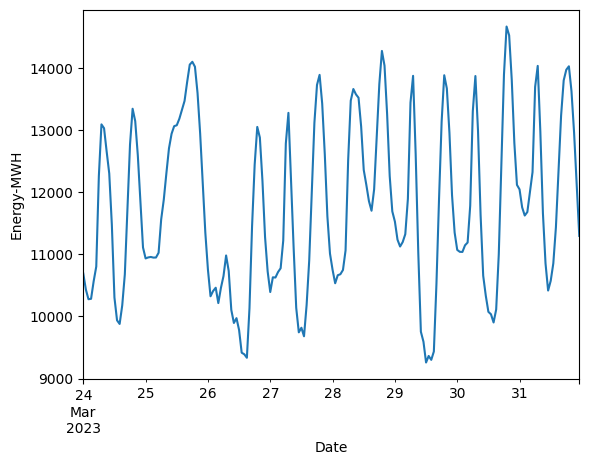

In [ ]:
# plot of energy demand for 1 week
energy['MWh'].plot()
plt.xlabel('Date')
plt.ylabel('Energy-MWH')
plt.show()

# Download weather data

In [ ]:

from __future__ import print_function
import json
import time
import datetime

try:
    from urllib.request import urlopen
except ImportError:
    from urllib2 import urlopen

MAX_ATTEMPTS = 6
SERVICE = "http://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?"


def download_data(uri):
    attempt = 0
    while attempt < MAX_ATTEMPTS:
        try:
            data = urlopen(uri, timeout=300).read().decode("utf-8")
            if data is not None and not data.startswith("ERROR"):
                return data
        except Exception as exp:
            print("download_data(%s) failed with %s" % (uri, exp))
            time.sleep(5)
        attempt += 1

    print("Exhausted attempts to download, returning empty data")
    return ""


def get_stations_from_filelist(filename):
    """Build a listing of stations from a simple file listing the stations.
    The file should simply have one station per line.
    """
    stations = []
    for line in open(filename):
        stations.append(line.strip())
    return stations


def get_stations_from_networks():
    stations = []
    # states = """AK AL AR AZ CA CO CT DE FL GA HI IA ID IL IN KS KY LA MA MD ME
    #  MI MN MO MS MT NC ND NE NH NJ NM NV NY OH OK OR PA RI SC SD TN TX UT VA VT
    #  WA WI WV WY"""
    states = 'CT'
    # IEM quirk to have Iowa AWOS sites in its own labeled network
    networks = ["AWOS"]
    for state in states.split():
        networks.append("%s_ASOS" % (state,))

    for network in networks:
        # Get metadata
        uri = (
            "https://mesonet.agron.iastate.edu/geojson/network/%s.geojson"
        ) % (network,)
        data = urlopen(uri)
        jdict = json.load(data)
        for site in jdict["features"]:
            stations.append(site["properties"]["sid"])
    return stations


def download_alldata():
    # timestamps in UTC to request data for
    startts = datetime.datetime(2023, 3, 24)
    endts = datetime.datetime(2023, 4, 1)
    interval = datetime.timedelta(hours=24)

    service = SERVICE + "data=all&tz=Etc/UTC&format=comma&latlon=yes&"

    now = startts
    while now < endts:
        thisurl = service
        thisurl += now.strftime("year1=%Y&month1=%m&day1=%d&")
        thisurl += (now + interval).strftime("year2=%Y&month2=%m&day2=%d&")
        print("Downloading: %s" % (now,))
        data = download_data(thisurl)
        outfn = "%s.txt" % (now.strftime("%Y%m%d"),)
        with open(outfn, "w") as fh:
            fh.write(data)
        now += interval


def main():
    # timestamps in UTC to request data for
    startts = datetime.datetime(2023, 3, 24)
    endts = datetime.datetime(2023, 4, 1)

    service = SERVICE + "data=all&tz=Etc/UTC&format=comma&latlon=yes&"

    service += startts.strftime("year1=%Y&month1=%m&day1=%d&")
    service += endts.strftime("year2=%Y&month2=%m&day2=%d&")

    # Two examples of how to specify a list of stations
    stations = get_stations_from_networks()
    # stations = get_stations_from_filelist("mystations.txt")
    for station in stations:
        uri = "%s&station=%s" % (service, station)
        print("Downloading: %s" % (station,))
        data = download_data(uri)
        outfn = "%s_%s_%s.txt" % (
            station,
            startts.strftime("%Y%m%d%H%M"),
            endts.strftime("%Y%m%d%H%M"),
        )
        out = open(outfn, "w")
        out.write(data)
        out.close()


if __name__ == "__main__":
    download_alldata()
    # main()

Downloading: 2023-03-24 00:00:00
Downloading: 2023-03-25 00:00:00
Downloading: 2023-03-26 00:00:00
Downloading: 2023-03-27 00:00:00
Downloading: 2023-03-28 00:00:00
Downloading: 2023-03-29 00:00:00
Downloading: 2023-03-30 00:00:00
Downloading: 2023-03-31 00:00:00


## merge weather data

In [ ]:
import pandas as pd
df = pd.read_table('20230324.txt')
df

,#DEBUG: Format Typ -> comma
0,#DEBUG: Time Period -> 2023-03-24 00:00:00+0...
1,#DEBUG: Time Zone -> Etc/UTC
2,#DEBUG: Data Contact -> daryl herzmann akrhe...
3,#DEBUG: Entries Found -> -1
4,"station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt..."
...,...
451165,"PAH,2023-03-24 23:59,-88.7744,37.0563,57.00,54..."
451166,"SGF,2023-03-24 23:59,-93.3897,37.2397,46.90,46..."
451167,"EHLW,2023-03-24 23:59,5.7517,53.2231,48.20,44...."
451168,"MRT,2023-03-24 23:59,-83.3516,40.2247,41.00,30..."


In [ ]:
import glob
path = '/content' 
all_files = glob.glob(path + "/2023*.txt")
all_files

['/content/20230324.txt',
 '/content/20230329.txt',
 '/content/20230325.txt',
 '/content/20230328.txt',
 '/content/20230327.txt',
 '/content/20230330.txt',
 '/content/20230331.txt',
 '/content/20230326.txt']

In [ ]:
import pandas as pd
import glob

path = '/content'
all_files = glob.glob(path + "/2023*.txt")

li = []

for filename in all_files:
    df = pd.read_table(filename, index_col=None, skiprows=5, sep=',')
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

<ipython-input-27-dd2bddbaa8ba>:10: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(filename, index_col=None, skiprows=5, sep=',')


In [ ]:
df

## Explore weather data- how many station do we have in CT ?

In [ ]:
df['station'].nunique() # 5k different airports!

In [ ]:
df['station'].unique() # the individual names of the stations
                       

array(['CWZV', 'OJAI', 'OJAM', ..., 'FZNA', 'FZRF', 'VERP'], dtype=object)

In [ ]:
df['station'].value_counts() # number of observations per station

PVG     2778
MLP     2711
PFEL    2709
PAVC    2703
EVW     2699
        ... 
HLLM       1
SCRM       1
PAPC       1
QQY        1
VERP       1
Name: station, Length: 5566, dtype: int64

### summary statistics

In [ ]:
df['station'].value_counts().describe()

count    5566.000000
mean      709.621092
std       845.487739
min         1.000000
25%       192.000000
50%       383.000000
75%       575.000000
max      2778.000000
Name: station, dtype: float64

On average, it looks like the average station has around 700 observations - this makes sense for 8 days of data.

### kde

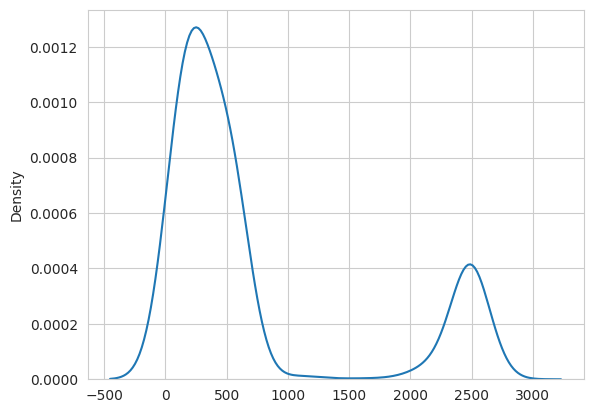

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
sns.kdeplot(np.array(df['station'].value_counts()))
plt.show()

## Data Preprocessing 

1. only get necessary columns
2. identify any missing values 


In [ ]:
# we are intrested in temp and station only so keeping only 4 columns

df1=df[['station', 'lat', 'lon', 'tmpf']]

# identify if there is any missing vlaue , we can see that tempf is object so this will not tell you 
# as tempf column is string we are not able to identify from .info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949751 entries, 0 to 3949750
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   station  object 
 1   lat      float64
 2   lon      float64
 3   tmpf     object 
dtypes: float64(2), object(2)
memory usage: 120.5+ MB


In [ ]:
# identify missing vlaue with help of vlaue count
df1['tmpf'].value_counts() 

M         2266720
50.00       43277
32.00       40381
46.40       38363
41.00       37779
           ...   
99.70           1
-34.10          1
127.80          1
135.00          1
94.80           1
Name: tmpf, Length: 800, dtype: int64

In [ ]:
# tempf is not numeric coumn so when you run this it wont give you missing vlaue so we will use value count to find out those
df1['tmpf'].isna().sum() 

0

In [ ]:
df1['tmpf'] = df1['tmpf'].str.replace('M', '')

<ipython-input-37-352891034d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tmpf'] = df1['tmpf'].str.replace('M', '')


In [ ]:
df1['tmpf']=pd.to_numeric(df1['tmpf'])

<ipython-input-38-eb1b61c262bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tmpf']=pd.to_numeric(df1['tmpf'])


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949751 entries, 0 to 3949750
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   station  object 
 1   lat      float64
 2   lon      float64
 3   tmpf     float64
dtypes: float64(3), object(1)
memory usage: 120.5+ MB


In [ ]:
# now when converts to numeric we can see it has these missing vlaues 
df1['tmpf'].isna().sum() 

2266720

### Drop all missing value

In [ ]:
# for simplicity, less just drop any missing values
tmp = df1.dropna()
tmp.isna().sum() # good to go!

station    0
lat        0
lon        0
tmpf       0
dtype: int64

### take max temp of all station and group by station

In [ ]:
# now calculate the max per station using a groupby
tmp2 = tmp.groupby(tmp['station']).max()
tmp2

,lat,lon,tmpf
station,,,
04V,38.1000,-106.1700,55.4
04W,46.0229,-92.8952,44.6
05U,39.6042,-116.0051,50.0
06C,41.9893,-88.1012,68.4
06D,48.8844,-99.6208,28.4
...,...,...,...
ZYCC,43.9000,125.2167,75.2
ZYHB,46.0200,126.5800,71.6
ZYTL,38.9000,121.6333,71.6


#### Analyse max temp in each station 

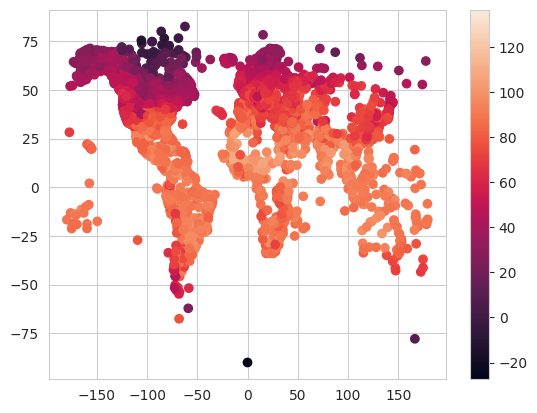

In [ ]:
# sometimes you need a colorbar instead of a legend
example = plt.scatter(x=tmp2['lon'], y=tmp2['lat'], c = tmp2['tmpf'])
plt.colorbar(example)
plt.show() # you can try to add a legend!

## Data Filter - take only 3 major station data and process it 

In [ ]:
# select three stations
df2 = df[(df['station']=='BDL') | (df['station']=='HVN') | (df['station']=='HPN')]
df2.shape

(7423, 32)

In [ ]:
df2=df2[['station','valid', 'lat', 'lon', 'tmpf']]
df2.shape

(7423, 5)

### convert valid in date time and tmpf in numeric column

In [ ]:
# first, make sure that 'valid' is a datetime 
df2['valid'] = pd.to_datetime(df2['valid'])

In [ ]:
df2.info()
df2['tmpf'] = df2['tmpf'].str.replace('M', '')
df2['tmpf'] = pd.to_numeric(df2['tmpf'], errors='coerce')
df2.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 7423 entries, 2040 to 3949542
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  7423 non-null   object        
 1   valid    7423 non-null   datetime64[ns]
 2   lat      7423 non-null   float64       
 3   lon      7423 non-null   float64       
 4   tmpf     7423 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 348.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7423 entries, 2040 to 3949542
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  7423 non-null   object        
 1   valid    7423 non-null   datetime64[ns]
 2   lat      7423 non-null   float64       
 3   lon      7423 non-null   float64       
 4   tmpf     672 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 348.0+ KB


### Convert data into date time formate so that it can be indexed

In [ ]:
# let's make a pivot table
tmp3 = pd.pivot_table(df2, index='valid', columns=['station'], aggfunc=max)

# check your work
tmp3.head()

lat                        lon                    \
station                  BDL      HPN      HVN      BDL      HPN      HVN   
valid                                                                       
2023-03-24 00:00:00  41.9381  41.0669  41.2638 -72.6825 -73.7075 -72.8868   
2023-03-24 00:05:00  41.9381  41.0669  41.2638 -72.6825 -73.7075 -72.8868   
2023-03-24 00:10:00  41.9381  41.0669  41.2638 -72.6825 -73.7075 -72.8868   
2023-03-24 00:15:00  41.9381  41.0669  41.2638 -72.6825 -73.7075 -72.8868   
2023-03-24 00:20:00  41.9381  41.0669  41.2638 -72.6825 -73.7075 -72.8868   

                     tmpf          
station               BDL HPN HVN  
valid                              
2023-03-24 00:00:00   NaN NaN NaN  
2023-03-24 00:05:00   NaN NaN NaN  
2023-03-24 00:10:00   NaN NaN NaN  
2023-03-24 00:15:00   NaN NaN NaN  
2023-03-24 00:20:00  52.0 NaN NaN

In [ ]:
#reset multicolumns
# this strips the whitespace and joins them together with a _
tmp3.columns = ['_'.join(col).strip() for col in tmp3.columns.values]
print(tmp3.shape)
tmp3.head() # see how these are easier to work with?


(2900, 9)


,lat_BDL,lat_HPN,lat_HVN,lon_BDL,lon_HPN,lon_HVN,tmpf_BDL,tmpf_HPN,tmpf_HVN
valid,,,,,,,,,
2023-03-24 00:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,NaN,NaN,NaN
2023-03-24 00:05:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,NaN,NaN,NaN
2023-03-24 00:10:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,NaN,NaN,NaN
2023-03-24 00:15:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,NaN,NaN,NaN
2023-03-24 00:20:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,52.0,NaN,NaN


### resample data on 60 min interval 

In [ ]:
tmp3 = tmp3.resample('60T').max()

In [ ]:
tmp3.shape

(192, 9)

### check if there is major temp diff between station

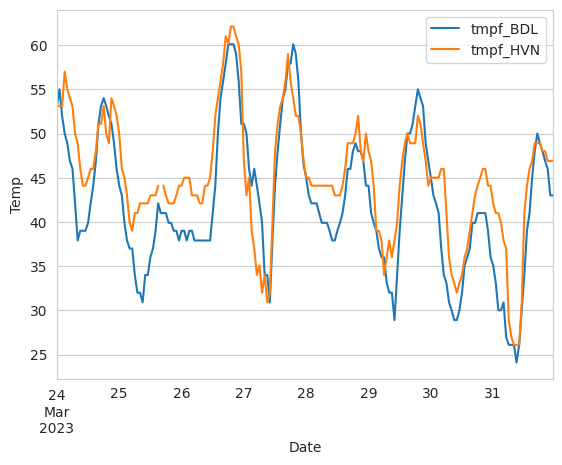

In [58]:
tmp3[['tmpf_BDL', 'tmpf_HVN']].plot()
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

# Join weather and energy data together


In [ ]:
weather = tmp3
weather.head() # check your work

,lat_BDL,lat_HPN,lat_HVN,lon_BDL,lon_HPN,lon_HVN,tmpf_BDL,tmpf_HPN,tmpf_HVN
valid,,,,,,,,,
2023-03-24 00:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,53.1,57.0,53.1
2023-03-24 01:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,55.0,57.0,53.1
2023-03-24 02:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,52.0,57.0,53.1
2023-03-24 03:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,50.0,55.0,57.0
2023-03-24 04:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,48.9,52.0,55.0


In [ ]:
# we will do the join on the index!
# both of the data has datetime as indexed column
df = weather.join(energy) 
df 

,lat_BDL,lat_HPN,lat_HVN,lon_BDL,lon_HPN,lon_HVN,tmpf_BDL,tmpf_HPN,tmpf_HVN,H,Date,HE,MWh
valid,,,,,,,,,,,,,
2023-03-24 00:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,53.1,57.0,53.1,D,2023-03-24 00:00:00,0,10690.84
2023-03-24 01:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,55.0,57.0,53.1,D,2023-03-24 01:00:00,1,10433.11
2023-03-24 02:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,52.0,57.0,53.1,D,2023-03-24 02:00:00,2,10277.69
2023-03-24 03:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,50.0,55.0,57.0,D,2023-03-24 03:00:00,3,10284.43
2023-03-24 04:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,48.9,52.0,55.0,D,2023-03-24 04:00:00,4,10567.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 19:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,48.0,48.0,48.0,D,2023-03-31 19:00:00,19,14026.86
2023-03-31 20:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,46.9,48.0,48.0,D,2023-03-31 20:00:00,20,13625.93
2023-03-31 21:00:00,41.9381,41.0669,41.2638,-72.6825,-73.7075,-72.8868,46.0,48.9,46.9,D,2023-03-31 21:00:00,21,12959.29


In [ ]:
df.shape

(192, 13)

# Time to Analyze!

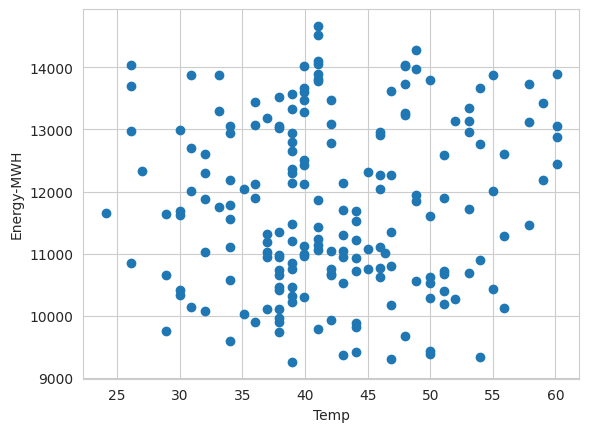

In [59]:
plt.scatter(x=df['tmpf_BDL'], y= df['MWh'])
plt.xlabel('Temp')
plt.ylabel('Energy-MWH')
plt.show()

In [ ]:
df.to_csv('cleanweather_energy.csv') # save data for further work